<a href="https://colab.research.google.com/github/axel-sirota/ml_ad_ai_course/blob/main/Classical%20ML/6_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

## Clustering

In this lab, we will use the [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-dataset) open dataset and scikit-learn clustering algorithms to effectively return the species of all those flowers!

The objective of this lab is to understand how clustering can help us identify "potential" labels of our dataset, which we can later on feed to supervised algorithms.

As we know, only 0.1% of real-world data has a label of each item (imagine an image and, next to it, a list of all the animals represented). This is what we call *annotated data*. However, annotation is often:

- Expensive
- Difficult to standardize
- Difficult to scale
- Sensitive to design changes
- Hard to do right



<img src="https://www.dropbox.com/scl/fi/g5lkwhrbsod6xps2b9fus/unlabeled-data-car.jpg?rlkey=rqe4ge1ctchi5z28epalgusdo&raw=1"  align="center"/>




Examples of non-annotated data include:

- Chats
- Audio
- Medical histories

So what can we do in that case? One of the common algorithms to attack this problem is _clustering_.

Clustering is a set of algorithms that find intrinsic associations in our data to end up with something like this:

![Clustering example](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/clustering-example.png)

There are two fundamental techniques for this: *hierarchical* and *non-hierarchical* clustering.

### Hierarchical Clustering

In Hierarchical clustering, which is also called agglomerative, we add elements in a nested way. For example:

![Hierarchical clustering example](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/hierarchiecal-clustering.png)

To do this, we do the following:

1. Start first cluster with the two elements closest to each other
2. Calculate the distance between this cluster and the other elements
3. Create a new cluster or append to existing one, based on which have the least distance (we append, by treating the new cluster as another element, if it is closest to the element)
4. Continue

Easy right?

Let's do it in Python! First we will import all the necessary packages:

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
np.random.seed(42)

We will now load the dataset, which is trivial in scikit-learn given its dataset loading abilities, and fit the hierarchical clustering model:

In [ ]:
iris = load_iris()
X = iris.data
model = AgglomerativeClustering(n_clusters=3, compute_distances=True)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

It is *THAT* easy! Let's see how well we performed:


In [ ]:
print(f'As expected, the number of clusters predicted by the models are {model.n_clusters_}')

predicted_labels = model.labels_
corrected_predicted_labels = np.where((predicted_labels==0)|(predicted_labels==1), predicted_labels^1, predicted_labels) # Hierarchiecal starts labels with 1 and the dataset with 0
real_labels = iris.target
equal = 0
for predicted_label, real_label in zip(corrected_predicted_labels, real_labels):
    if  predicted_label == real_label:
        equal += 1


print(f'Accuracy of hierarchiecal clustering with clusters specified is {100*equal / len(corrected_predicted_labels)} %')


As expected, the number of clusters predicted by the models are 3
Accuracy of hierarchiecal clustering with clusters specified is 89.33333333333333 %


Not so bad for a split second operation, right?! What this will do is:

1. Get a random flower
2. Calculate the distance of it against all other elements
3. Create a "cluster" of size 2 with the shortest sample
4. Iterate until all elements are in a cluster

What if we wanted to plot this? This would be as easy as:


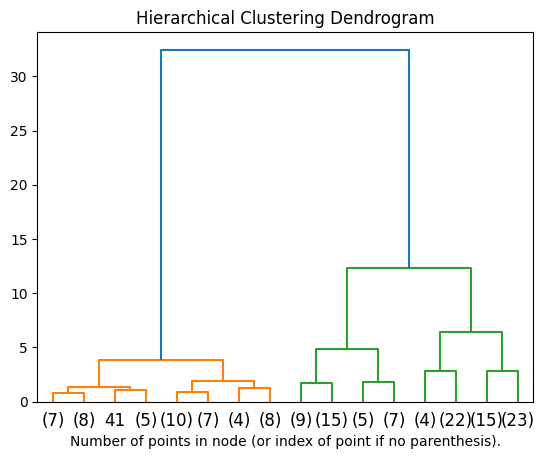

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Of course you may point out that it's easy when you know *ahead of time* that there are three clusters! And you would be right, but this example is just for you to get your feet wet and start learning.

There are multiple ways of optimizing the number of clusters hyperparameter, but that is out of scope for this introduction. If you're curious, I recommend checking out [_Hands-On Unsupervised Learning Using Python_](https://learning.oreilly.com/library/view/hands-on-unsupervised-learning/9781492035633/) by Ankur A. Patel (O'Reilly).

For know, lets move on to non-hierarchical clustering and its most prominent example: _k_-means!

### Non-Hierarchiechal Clustering

_k_-means is the most famous clustering algorithm of all, and for a good reason:

- It is stable
- It scales
- It is reliable
- It is well studied

In a nutshell, the objective of _k_-means is to find inherent clusters using the following recipe:

1. Start with _k_ randomly chosen landmarks for starting our clusters.
1. Assign every element to a cluster based on minimum distance (which can be anything we chose!).
1. Now that there are _k_ clusters, optimize them.
1. Calculate the centers of each cluster. This is done by averaging them out. These are the new landmarks for the next iteration.
1. Continue until there is no reassignment in step 2.

This process is represented by the following:

![_k_-means Example](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/kmeans.png )

First to perform _k_-means, we need to perform our imports:

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(42)
del predicted_labels
del model
del predicted_label
del corrected_predicted_labels

We will now load the dataset, which is trivial in scikit-learn with its dataset loading abilities, and then fit the _k_-means model:

In [ ]:
iris = load_iris()
X = iris.data
model = KMeans(n_clusters=3, init='random', max_iter=2000, tol=10**-7, random_state=42, n_init='auto')
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Let's compare it for a second with the clustering method we saw before by checking it's accuracy:

In [ ]:
predicted_labels = model.labels_
where_0 = np.where(predicted_labels == 0)
where_1 = np.where(predicted_labels == 1)

predicted_labels[where_0] = 1
predicted_labels[where_1] = 0
real_labels = iris.target
equal = 0
for predicted_label, real_label in zip(predicted_labels, real_labels):
    if  predicted_label == real_label:
        equal += 1


print(f'Accuracy of _k_-means clustering with clusters specified is {100*equal / len(predicted_labels)} %')

Accuracy of _k_-means clustering with clusters specified is 89.33333333333333 %


#### Figuring out the number of clusters

We can see that it doesn't seem like we have much difference! However, there _is_ a difference, because in _k_-means we have an analytical way of analyzing how to optimize it! Basically, we can calculate for each parameter the inertia of the resulting cluster, so we can optimize over it. This way, we can get the optimum number of clusters *without* knowing them ahead of time!

Let's try to do the same as before, but with an increasing number of clusters, and then compare the inertias:

In [ ]:
n_clusters = [1,2,3,4,5,6,7,8]
inertias = []
for cluster in n_clusters:
    del model  # So we remove previous references
    model = KMeans(n_clusters=cluster, random_state=42, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)

print(f'The inertias were: {inertias}')

The inertias were: [681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.446182051282065, 39.03998724608726, 34.46949589883801, 30.1865551948052]


If you check closely, the inertias decrease over time. There is a point, however, where the decrease isn't as steep. This means that we aren't gaining too much information by adding more clusters.

The *Elbow method* dictates that the point where the decrease in inertia starts to be "low" is the optimal number of clusters. So for our example:

In [ ]:
print(f'The differences in each step are: {[(i-j) for i, j in zip(inertias[:-1], inertias[1:])]}')

The differences in each step are: [529.0226482396421, 73.49651033421189, 21.622968211860275, 10.782291163003656, 7.406194805194808, 4.570491347249245, 4.282940704032811]


We can see that going from one cluster to two reduced the inertia by 77%, then we reduced it by another 48% but later on it only reduced by a bit (20 or less); so, we could say the optimal number of clusters is three. What we do then is a hierarchical clustering and confirm this in a dendrogram, as we did before.

However, _k_-means is not always the best algorithm since it expects clusters to be globular and of equal shape. Let's quickly analyze this in the next step!

### DBScan

If you find that _k_-means is not working for you, it might be because your data is not equivariant or globular; if so, there are other alternatives! One famous algorithm to revisit is *DB Scan*.

The idea behind DB Scan is to not form clusters by assigning all members and later on reduce a metric (inertia in _k_-means), but to check a cluster by the *density of its members*, characterized by the minimum number of elements needed to perform a cluster and the radius of the search space.

This way, DB Scan "scans" the whole map looking for neighbors and assigns in case there are sufficient, and sufficiently close! Check out this [video][dbscan] for an example.

[dbscan]:  http://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN) "DB Scan Example"

So to get a handle on this in code, first we do our imports:

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Later on we might create artificial data, but for this we use the super useful `make_blobs` method from scikit-learn:

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

Next we'll perform the scan, setting the ratio as 0.3 and the minimum elements to create a cluster as 10:

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Finally, let's see how it goes! Run the following:


In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


Not too shabby! DB Scan automatically discovered the three clusters and also removed the 18 outliers, setting them as not being in any cluster!

DB Scan is a bit slower than _k_-means and does not parallelize as the latter does, but it is extremely good at finding the "correct clusters." Using the three tools we have seen, we have a perfect toolkit to find the correct number of tentative labels for our data!


To recap, we did the following:

- Learned about unsupervised learning and the types of clustering
- Performed a hierarchical clustering, finding out how to visually represent our clusters
- Migrated into non hierarchical clustering checking out the most famous algorithm of all, _k_-means, and look at its assumptions and how to find out the number of clusters to set
- Finally, we briefly explored DB Scan to analyze density based clustering and how it helps us find, intrinsically, any outliers and the correct number of clusters


## PCA

In this section we will use the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) open dataset and scikit-learn to effectively classify the correct famous person from our images!

The objective of this section is to understand how PCA can help us identify representative new curated features that allow for easier calculations.

In the previous section, we learned how we can find aggregations of our non-annotated dataset with clustering. However, as the number of dimensions increases drastically, that operation becomes more complex and less robust, since in a highly dimensional space, outliers are more difficult to find! A collection of images presents a good example of the number of dimensions we may need to treat.

A normal, super low definition color image has the following axes: width x height x length x color scale. This means that a simple RGB image has 256 x 256 x 256 x 3, or _50 million_ different values! That is incredibly large, and we aren't even talking about 4k videos or audio!
 <!-- (which have even more values, since this is only one frame and a low definition video has 30 of those PER second) -->

As a result, you may guess that we need to reduce this dimensionality into key numbers that contain "most" of the information: and now we are in the domain of *dimensionality reduction*.


The basic idea of dimensionality reduction can be described as:

- Given a dataset with n variables, probably correlated
- Find a new new dataset with _p_ variables that “explain the same”
- Have a way of going back!

Here is an illustration of this idea:

![PCA example](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/pca.png)

Why is this useful? It's useful for many, many reasons:

- We can compress data to be able to send it easily
- We can use this technique before any other supervised learning in order to make our computations faster
- It's cool!

Let's see how to do this in Python, first with a simple Iris lab. As always, let's first import the necessary modules:


In [ ]:
import numpy as np
from sklearn import decomposition
from sklearn import datasets
np.random.seed(42)

Later on, we define the dataset and we perform the PCA algorithm, specifying the number of components we want to retain (i.e., the number of dimensions we want to keep):


In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = decomposition.PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

That's it, we did it! In one line, we did that super complex operation. Incredible, right?!

Up to this point, we *trained* a PCA algorithm on the directions we want to keep, and now we will *project* our values (which can have many dimensions) into the one that the algorithm found!

You can see an example in the following, where projecting the original values into the first two components (PC1, PC2) retained most of the information:

![PCA example 2](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/pca2.png)


In [ ]:
new_X = pca.transform(X)
print(f'Shape of old values are {np.shape(X)}')
print(f'Shape of new transformed values are {np.shape(new_X)}')

Shape of old values are (150, 4)
Shape of new transformed values are (150, 1)


As we can imagine, now the dimension of the new `X` is `number_of_samples` times 1, because we retained one component!

You might be wondering: how much of the information we retained? For that, we have the percent of explained variance, which measures how much we "lost" in transforming our original data to this new dataset (the mathematics about this are really complex, so just trust me here):

In [ ]:
print(f'We only lost {100-100*sum(pca.explained_variance_ratio_)}% of information')

We only lost 7.538127679827284% of information


Pretty incredible, right?

And now we can do whatever we want! For example, we can perform _k_-means and check if we can do better than before:

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='random', max_iter=2000, tol=10**-7, random_state=42, n_init=10)
model.fit_predict(new_X)
predicted_labels = model.labels_
print(predicted_labels)
# where_2 = np.where(predicted_labels == 2)
where_1 = np.where(predicted_labels == 1)
where_0 = np.where(predicted_labels == 0)

# predicted_labels[where_2] = 1
predicted_labels[where_0] = 1
predicted_labels[where_1] = 0
real_labels = iris.target
equal = 0
for predicted_label, real_label in zip(predicted_labels, real_labels):
    if  predicted_label == real_label:
        equal += 1

print(f'Accuracy of K Means clustering with clusters specified is {100*equal / len(predicted_labels)} %')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 0]
Accuracy of K Means clustering with clusters specified is 91.33333333333333 %


By squashing into a single component, the whole clustering just got WAY easier! And of course, we can revert and go back, so it is _that_ incredible!

### Playing with images

Now that we know about PCA and how it leverages the reduction of dimensionality, let's look at best way to use this knowledge that play around with images!
Images are a perfect case for PCA, since we can reduce those terrible 50 million points to just a few.

We will create what is known as a *Machine Learning Pipeline* that will use PCA to make images more tractable, which will then help us pass them through a classifier to predict faces. Note that it is *not* the objective of this lab to explain all the parts of the classifier, so don't worry about that!

This example comes from the excellent [scikit-learn docs](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py), and I highly recommend taking a look at them.

First, as always, let's import everything:

In [ ]:
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
np.random.seed(42)
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Next, we will load the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) dataset:

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


Note that we have around 1,200 images with 1,850 dimensions (so images will be a bit blurry), and 7 different people!

What we will do now is split our dataset between training, test, and validation sets so we can check the performance of our pipeline later on. This is a normal practice in Supervised Learning (since the labels already exist!), because we may want to compare multiple classifiers.

As that can take a bunch of time, we will first reduce the dimension to 150 components with PCA:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 966 faces
Projecting the input data on the eigenfaces orthonormal basis


A key factor is that we trained our PCA with the training set, and later on transformed the other sets with *that exact trained PCA*; we did not train another one! Let's try to debug how much of the variance remained by keeping only 150 components:


In [ ]:
print(f'We only lost {100-100*sum(pca.explained_variance_ratio_)}% of information')

We only lost 5.330208141822368% of information


Finally, we train an SVM classifier with multiple possible hyperparameters using cross validation (a common supervised learning technique) to get the final classifier and check its performance:

In [ ]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)  # Check that we use the transofrmed test set on the PCA trained on the TRAIN set!

print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.80      0.88      0.84        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.85      0.98      0.91       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.91      0.83      0.87        36

         accuracy                           0.86       322
        macro avg       0.91      0.74      0.80       322
     weighted avg       0.87      0.86      0.86       322



We can verify that we have really high accuracy (>85%), considering we just took two seconds to run this! The magic lies in the PCA algorithms that allowed us to reduce much of the "clutter" into valuable information. I encourage you to try it out at home with greater or fewer components to see how it differs!

To recap, we did the following:

- Learned about dimensionality reduction
- Performed PCA on the Iris dataset and verified that with less dimensions we can easily distinguish information like the clusters
- Performed a _Machine Learning Pipeline_ by first compressing images in order to set an SVM classifier later on; we retained a lot of the information and quickly got to an >85% classifier


## Anomaly Detection

In this section, we will explore both outlier and anomaly detection algorithms to improve our estimates.

The objective of this section is to understand how outliers can be detected in several ways. By removing them from the training set, we can obtain better models.

Many applications require being able to decide whether a new observation belongs to the same distribution as existing observations (i.e., an _inlier_), or should be considered as different (i.e., an _outlier_). However, we must distinguish between:

- Outlier detection: when we try to find spurious data in our dataset
- Novelty detection: when we try to determine if a new datapoint belongs to the same distribution as ours

The main differentiator is that in the former case, we can assume that outliers are in low density regions (since they are "odd"), however in the latter, we may have a new "cluster" of new data points, which makes the problem way harder!

### Outlier Detection

One of the most common outlier detection algorithms is Local Outlier Factor (LOF), which basically calculates the "amount of neighbors per unit of distance" to determine a density per datapoint, and then, with a given threshold, it determines whether each datapoint is an inlier or outlier. It is quite powerful for such a simple idea!

Let's take a look at the code:

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

Now we will generate some data with outliers to verify how it performs:

In [ ]:
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

We then train our model to classify correctly the outliers:


In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
print(f'The accuracy on finding outliers is {100*(y_pred == ground_truth).sum()/len(X)} %')

The accuracy on finding outliers is 96.36363636363636 %


It's pretty amazing how easy it is! For example, if we get the final datapoint, let's calculate its score:

In [ ]:
print(f'The difference in density score between the last datapoint (which was outlier) and the first datapoint (which was inlier) is {-100*(clf.negative_outlier_factor_[0] - clf.negative_outlier_factor_[-1])/clf.negative_outlier_factor_[0]} %')

The difference in density score between the last datapoint (which was outlier) and the first datapoint (which was inlier) is 384.58157325255985 %


Of course, there are multiple other algorithms for outlier finding. I recommend reading the [scikit-learn docs](https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection). But for now, let's switch to another efficient algorithm is good to have in mind: Isolation Forests!

### Isolation Forests

Now that we know how to find outliers with LOF, let's discover another method that is highly stable in high dimensions: Isolation Forests.

The idea is quite complex but the implementation is dead easy!

The idea is that if we select a feature by random, and create a decision tree over it then we would split our data. If we do this recursively then we have a decision tree to split our data points; however it is seen that outliers have shorter paths to be split from the rest, since they are spatially separated; ergo we can calculate the average path over all possible decision trees and the ones with lower scores are outliers.

In code it looks like this, where 100 is obviously an outlier:

In [ ]:
from sklearn.ensemble import IsolationForest
X = [[-1.1], [0.3], [0.5], [100]]
clf = IsolationForest(random_state=42).fit(X)
clf.predict([[0.1], [0], [90]])

array([ 1,  1, -1])

We can verify that the forest correctly assigned a -1 to 90, marking it as an outlier. Let's see how it compares with LOF in the example from before! As always, we first import everything and create the dataset:

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [ ]:
clf = IsolationForest(random_state=42).fit(X)
y_pred = clf.predict(X)
print(f'The accuracy on finding outliers is {100*(y_pred == ground_truth).sum()/len(X)} %')

The accuracy on finding outliers is 96.36363636363636 %


Again we got a remarkably high accuracy! Next, let's compare both methods in a more complex dataset.

### Comparing LOF and Isolation Forests

First let's import everything:

In [ ]:
import numpy as np
from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)
rng = np.random.RandomState(42)

Now we create the datasets. We will create a unimodal, bimodal, bimodal with different variance, and a moon dataset:


In [ ]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = {'unimodal':
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    'bimodal': make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    'bimodal and not equivariant': make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    'moon shaped': 4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25]))}


Now we will compare the efficiency of both algorithms in all settings:


In [ ]:
for name, X in datasets.items():
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)
    ground_truth = np.ones(len(X), dtype=int)
    ground_truth[-n_outliers:] = -1
    isolation = IsolationForest(contamination=outliers_fraction, random_state=42)
    isolation.fit(X)
    lof = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)
    lof.fit(X)
    y_pred_lof = lof.fit_predict(X)
    y_pred_isol = isolation.fit(X).predict(X)
    print(f'The accuracy on finding outliers with LOF and dataset {name} is {round(100*(y_pred_lof == ground_truth).sum()/len(X),2)} %')
    print(f'The accuracy on finding outliers with Isolation Forests and dataset {name} is {round(100*(y_pred_isol == ground_truth).sum()/len(X),2)} %')

print('Comparison done!')

The accuracy on finding outliers with LOF and dataset unimodal is 100.0 %
The accuracy on finding outliers with Isolation Forests and dataset unimodal is 100.0 %
The accuracy on finding outliers with LOF and dataset bimodal is 99.33 %
The accuracy on finding outliers with Isolation Forests and dataset bimodal is 99.33 %
The accuracy on finding outliers with LOF and dataset bimodal and not equivariant is 89.33 %
The accuracy on finding outliers with Isolation Forests and dataset bimodal and not equivariant is 90.67 %
The accuracy on finding outliers with LOF and dataset moon shaped is 85.8 %
The accuracy on finding outliers with Isolation Forests and dataset moon shaped is 87.54 %
Comparison done!


We can verify that Isolation Forests was slightly better in "weirder data" and LOF was better in data coming from a known distribution.


### Novelty Detection

As a closing section, let's try to do novelty detection! The harder part in this topic is that there may be clusters of new data that correspond to a novel distribution, but our old algorithms wouldn't detect them.

In more formal terms, the idea is to learn a rough, close frontier delimiting the contour of the initial observations distribution plotted in embedding *p*-dimensional space. Then, if further observations are within the frontier-delimited subspace, they are considered as coming from the same population as the initial observations. Otherwise, if they are outside the frontier, we can say that they are abnormal with a given confidence in our assessment.

We can use LOF for novelty detection, since we may estimate that a new datapoint is probably anomalous if it is far from all the other clusters. It is not the most famous anomaly detection algorithm, but it is a nice start since we already know how to play with it!

First we do our imports:

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
np.random.seed(42)

In [ ]:
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_novel = np.random.uniform(low=-4, high=4, size=(20, 2))

Now we train our LOF with the training data, and then verify with the test data (not novel) and the novel dataset (novel) and see how it performs:

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)

y_pred_test = clf.predict(X_test)
y_pred_novel = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_novel = y_pred_novel[y_pred_novel == 1].size

print(f'Accuracy on non-novel distributions: {round(100*(1- (n_error_test/len(X_test))),2)} ')
print(f'Accuracy on novel distributions: {round(100*(1- (n_error_novel/len(X_novel))),2)} ')

Accuracy on non-novel distributions: 80.0 
Accuracy on novel distributions: 95.0 


Not so shabby for a simple outlier detection used as novelty!

Let's now learn about another algorithm that was designed for this task: one class SVM with RBF kernels. This is best described in the original paper: Schölkopf, Bernhard, et al., "Estimating the support of a high-dimensional distribution," *Neural Computation* 13.7 (2001): 1443-1471.

One class SVM with kernel learns a decision function, like all SVM algorithms do, to maximize the margin of our training data in a robust way. When we mix this with non-linear kernels, we end up with really interesting decision boundaries to determine if new data is novel or not! Here's an illustration:

![SVM example](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/svm.png)

On the same dataset as before, we now run:

In [ ]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_novel = clf.predict(X_novel)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_novel = y_pred_novel[y_pred_novel == 1].size

print(f'Accuracy on training data: {round(100*(1- (n_error_train/len(X_train))),2)} ')
print(f'Accuracy on non-novel distributions: {round(100*(1- (n_error_test/len(X_test))),2)} ')
print(f'Accuracy on novel distributions: {round(100*(1- (n_error_novel/len(X_novel))),2)} ')

Accuracy on training data: 89.5 
Accuracy on non-novel distributions: 82.5 
Accuracy on novel distributions: 100.0 


As we can check by comparison, SVM with RBF kernel is pretty good at detecting novel data!

To recap, we did the following:

- Learned about outlier and novelty detection
- Performed outlier detection both with LOF as well as Isolation Forests, comparing the optimality of each method in each case
- Learned about novelty detection with both LOF and SVM with RBF kernels

# Now you do it
<img src="https://www.dropbox.com/scl/fi/76r2mea69m6mdinnaqweh/hands_on.jpg?rlkey=bchhotvwfjzgb7hc35igxxphs&raw=1" width="100" height="100" align="right"/>

We will work with the [breast cancer proteomes](https://www.dropbox.com/scl/fi/1lmsdumz7wbpi041o2wq6/77_cancer_proteomes_CPTAC_itraq.csv?rlkey=6xl7ozj88z2iwv607xhxc70kx&dl=0) and [clinical data](https://www.dropbox.com/scl/fi/0w1ir24w99b06azh3uspu/clinical_data_breast_cancer.csv?rlkey=j71xv3qbdickar92pfjff3om2&dl=0)
The objective of this exercise is to understand how unsupervised learning can provide insights to later merge in the pipeline before finalizing with supervised techniques to solve a machine learning problem.

In [ ]:
%%writefile get_data.sh
if [ ! -f ./77_cancer_proteomes_CPTAC_itraq.csv ]; then
  wget -O ./77_cancer_proteomes_CPTAC_itraq.csv https://www.dropbox.com/scl/fi/1lmsdumz7wbpi041o2wq6/77_cancer_proteomes_CPTAC_itraq.csv?rlkey=6xl7ozj88z2iwv607xhxc70kx&dl=0
fi
if [ ! -f ./clinical_data_breast_cancer.csv ]; then
  wget -O ./clinical_data_breast_cancer.csv https://www.dropbox.com/scl/fi/0w1ir24w99b06azh3uspu/clinical_data_breast_cancer.csv?rlkey=j71xv3qbdickar92pfjff3om2&dl=0
fi

Overwriting get_data.sh


In [ ]:
!bash get_data.sh

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.ensemble import IsolationForest
import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition
import re
np.random.seed(42)


split_name=re.compile('[.-]')

def rename_patients(name):
    components=split_name.split(name)
    return '-'.join(('TCGA',components[0],components[1]))

protein_activity=pd.read_csv("./77_cancer_proteomes_CPTAC_itraq.csv")
protein_activity.set_index(['RefSeq_accession_number','gene_symbol','gene_name'],inplace=True)
protein_activity.fillna(protein_activity.median(),inplace=True)
protein_activity.rename(columns=rename_patients,inplace=True)
clinical_data=pd.read_csv("./clinical_data_breast_cancer.csv").set_index('Complete TCGA ID')